# Project: Compute the Profit and Breakeven Points for a Jade Lizard at Expiration

### Background
Call and put contracts can be combined to develop composite contract structures with interesting payoff diagrams. Let's limit our focus to contracts that have the same underlying asset and the same expiration date. A composite option contract be composed of $d$ legs (individual contracts) in the contract set $\mathcal{C}$ where each leg $i\in\mathcal{C}$ is written with respect to the same underlying stock `XYZ` and has the same expiration date. Then, the overall payoff of the composite contract $\hat{V}(S(T),K_{1},\dots,K_{d})$ is given by:


$$\hat{V}(S(T),K_{1},\dots,K_{d}) = \sum_{i\in\mathcal{C}}\theta_{i}n_{i}V_{i}(S(T),K_{i})$$


where $K_{i}$ denotes the strike price of contract $i\in\mathcal{C}$. The overall profit of the composite contract $\hat{P}$ is given by:


$$\hat{P}(S(T),K_{1},\dots,K_{d}) = \sum_{i\in\mathcal{C}}\theta_{i}n_{i}P_{i}(S(T),K_{i})$$


where $\theta_{i}$ denotes the direction of contract $i$: if contract $i$ is short (sold), then $\theta_{i}=-1$, otherwise $\theta_{i}=1$, $n_{i}$ denotes the copy number of contract $i$, ${V}_{i}(S(T),K_{i})$ denotes the payoff of contract $i$, and $P_{i}(S(T),K_{i})$ denotes the profit of contract $i$. Finally, the profit for contract of type $\star$ is given by:

$$P_{\star}(K,S(T)) = {V}_{\star}(K,S(T)) -  \mathcal{P}_{\star}(K,S(0))$$

where $\mathcal{P}_{\star}(K,S(0))$ denotes the premium of contract $\star$, and ${V}_{\star}(K,S(T))$ denotes the payoff of contract $\star$ at expiration.

### Jade Lizard
The [Jade Lizard strategy](https://www.tastylive.com/concepts-strategies/jade-lizard) is a `neutral to bullish` strategy that is constructed using a combination of $3~\times$ option contracts: a `short put`, a `short call`, and a `long call`. It involves selling an out-of-the-money (OTM) `put` and an OTM `call`, while simultaneously buying a further OTM `call`.

## Learning Objectives
For this project, you will compute the profit diagram and breakeven point(s) at expiration for a [Jade Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard) constructed on [Advanced Micro Devices (AMD)](https://en.wikipedia.org/wiki/AMD). To support this calculation, we havce provided the options chain data for `AMD` from [barchart.com](https://www.barchart.com). In this dataset, the share price of `AMD` is `S(0) = 117.50 USD/share`, and the average implied volatility for `AMD` options with `DTE = 31 days` is `IV = 51.75%`.

* __Task 1__: Compute the profit array for a Jade Lizard with an expiration share price of `S(T) = [80,160]` USD/share. Plot the profit for the overall trade, and the profit for each leg versus the share price at expiration.
* __Task 2__: Compute the breakeven point(s) for a [Jade Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard)

## Setup

In [1]:
include("Include.jl");

## Prerequisite: Load options chain dataset
To start, load the options data using using the `loadoptionsdata(...)` function and store the data in the `options_dataset` variable:

In [2]:
options_dataset = loadoptionsdata();

## Task 1: Compute and plot the P/L for a Jade Lizard

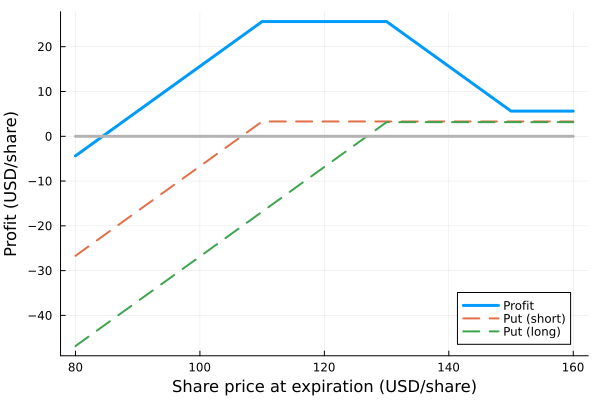

In [7]:
K₁ = 110.0
K₂ = 130.0
K₃ = 150.0

premium_1 = filter([:Strike,:Type] => (x,y) -> (x == K₁ && y == "Put"), options_dataset)[1,:Midpoint];
premium_2 = filter([:Strike,:Type] => (x,y) -> (x == K₂ && y == "Call"), options_dataset)[1,:Midpoint];
premium_3 = filter([:Strike,:Type] => (x,y) -> (x == K₃ && y == "Call"), options_dataset)[1,:Midpoint];
    
    
put_contract_model_short = build(MyAmericanPutContractModel, (
        K = K₁, premium = premium_1, sense = -1
));

call_contract_model_short = build(MyAmericanPutContractModel, (
        K = K₂, premium = premium_2, sense = -1
));


call_contract_model_long = build(MyAmericanPutContractModel, (
        K = K₃, premium = premium_3, sense = 1
));

S = range(80,stop = 160, step=0.1) |> collect;
BEL = zeros(length(S))
profit_array = profit([put_contract_model_short, call_contract_model_short, call_contract_model_long], S);

plot(profit_array[:,1], profit_array[:,5], lw=3, label="Profit")
plot!(profit_array[:,1], profit_array[:,2], lw=2, label="Put (short)", ls=:dash)
plot!(profit_array[:,1], profit_array[:,3], lw=2, label="Put (long)", ls=:dash)

plot!(S,BEL,lw=3, c=:gray70, label="")


xlabel!("Share price at expiration (USD/share)", fontsize=18)
ylabel!("Profit (USD/share)", fontsize=18)

## Task 2: Compute the breakeven for a Jade Lizard

In [8]:
# fill me in